In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt

api_key = pd.read_json('fmp_api_key.json').iloc[0].to_list()[0]

In [3]:
### Financial Statements
revenuesExpenses = ['revenue',
 'costOfRevenue',
 'grossProfit',
 'researchAndDevelopmentExpenses',
 'generalAndAdministrativeExpenses',
 'sellingAndMarketingExpenses',
 'otherExpenses',                   
 'operatingExpenses',
 'costAndExpenses',
 'interestExpense',
 'depreciationAndAmortization',
 'operatingIncome',
 'totalOtherIncomeExpensesNet',
 'incomeBeforeTax', 
 'incomeTaxExpense',
 'netIncome']

ignoreList = ['reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'link', 'finalLink']
headers = {'Content-Type': 'application/json'}

def drop_ignoreList(df, ignoreList):
    """ 
    Input: dataframe and a list of columns to be dropped.
    Output: dataframe with indices 'symbol' and 'date'
    """
    df.drop(ignoreList, axis=1, inplace=True)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['symbol', 'date'], inplace=True)
    
    return df

def get_income_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of income_statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income statement with revenues and expenses given in millions.  
    """  
    if period == 'FY':
        limit = 120
    else:
        limit = 400
        
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, ignoreList)
    
    # Convert revenueExpenses into millions.
    df[revenuesExpenses] = df[revenuesExpenses].apply(lambda x:x*1.0e-6)
    
    return df

def get_balance_sheet_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, ignoreList)
    
    # Convert values into millions.
    df = df.apply(lambda x:x*1.0e-6)
    
    return df

def get_cash_flow_statement(ticker, period):
    """ 
    Inputs: stock ticker and period of cash-flow-statement ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement in $millions.  
    """   
    if period == 'FY':
        limit = 120
    else:
        limit = 400
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, ignoreList)
    
    # Convert values into millions.
    df = df.apply(lambda x:x*1.0e-6)
    
    return df

### Financial Statements Growth
def get_income_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of income-statement-growth ('FY' only). 
            Inputs must be of string type.
    Outputs: pandas dataframe for income-statement-growth. 
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/income-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)    
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

def get_balance_sheet_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of balance-sheet-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for balance-sheet-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/balance-sheet-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

def get_cash_flow_statement_growth(ticker, period='FY'):
    """ 
    Inputs: stock ticker and period of cash-flow-statement-growth ('FY' or 'quarter'). 
            Inputs must be of string type.
    Outputs: pandas dataframe for cash-flow-statement-growth.
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/cash-flow-statement-growth/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

### Company Financial Ratios
def get_financial_ratios_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM ratios
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios-ttm/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

def get_financial_ratios(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company ratios
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 140
    response = requests.get("https://financialmodelingprep.com/api/v3/ratios/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df


### Company Key Metrics
def get_key_metrics_ttm(ticker):
    """ 
    Inputs: stock ticker (type: string)
    Outputs: pandas dataframe for company TTM key metrics
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics-ttm/" +
                       ticker + "?limit=40" + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())        
        return df
    
    else:
        pass
    
def get_key_metrics(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company key metrics
    """   
    if period == 'FY':
        limit = 40
    else:
        limit = 130
        
    response = requests.get("https://financialmodelingprep.com/api/v3/key-metrics/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        df = drop_ignoreList(df, [])
        
        return df
    
    else:
        pass

### Company Financial Growth
def get_financial_growth(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company financial growth
    """   
    if period == 'FY':
        limit = 20
    else:
        limit = 80
    response = requests.get("https://financialmodelingprep.com/api/v3/financial-growth/" +
                       ticker + "?period=" + period + "&limit=" + str(limit) + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

### Company Discounted cash flow value
def get_discounted_cash_flow(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

def get_hist_discounted_cash_flow(ticker, period):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-discounted-cash-flow/" +
                       ticker + "?period=" + period + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json()[0]['historicalDCF'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(['date'], inplace=True)
        
    return df

def get_hist_discounted_cash_flow_daily(ticker):
    """ 
    Inputs: stock ticker and period ('FY' or 'quarter')
            Inputs must be of string type.
    Outputs: pandas dataframe for company daily historical discounted cash flow
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/historical-daily-discounted-cash-flow/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

# Earnings Calendar
def get_earnings_calendar():
    """ 
    Inputs: none
    Outputs: dataframe for earnings calendar
    """   
    response = requests.get("https://financialmodelingprep.com/api/v3/earning_calendar/" +
                       "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    
    return df

# Company Profile
def get_profile(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company profile
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/profile/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    if response.json() != []:
        df = pd.json_normalize(response.json())
        
        return df.transpose()
    
    else:
        pass

# Institutional holders
def get_institutional_holder(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: dataframe for institutional holders
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/institutional-holder/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())    
    
    return df

# Earnings Surprises
def get_earnings_surprises(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company earning-surprises
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/earnings-surprises/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df = drop_ignoreList(df, [])
    df['earningSurprise'] =  ((df['actualEarningResult'] - df['estimatedEarning']) / abs(df['estimatedEarning'])) * 100
    
    return df

# Key Executives
def get_key_executives(ticker):
    """
    Inputs: stock ticker in string type
    Outputs: pandas dataframe for company key executives
    """
    response = requests.get("https://financialmodelingprep.com/api/v3/key-executives/" +
                       ticker + "?apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    
    return df

### Stock Screener
- marketCapMoreThan & marketCapLowerThan : Number
- priceMoreThan & priceLowerThan : Number
- betaMoreThan & betaLowerThan : Number
- volumeMoreThan & volumeLowerThan : Number
- dividendMoreThan & dividendLowerThan : Number
- isEtf & isActivelyTrading : true/false
- sector : Consumer Cyclical - Energy - Technology - Industrials - Financial Services - Basic Materials - Communication Services - Consumer Defensive - Healthcare - Real Estate - Utilities - Industrial Goods - Financial - Services - Conglomerates
- Industry : Autos - Banks - Banks Diversified - Software - Banks Regional - Beverages Alcoholic - Beverages Brewers - Beverages - Non-Alcoholic
- Country : US - UK - MX - BR - RU - HK - CA - ...
- exchange : nyse - nasdaq - amex - euronex - tsx - etf - mutual_fund
- limit : Number

Large Cap >= 10B

2B =< Mid Cap < 10B

0.3B < Small Cap < 2B

In [ ]:
profile = get_profile('FMC').iloc[[0,4,9,14,15,19,20,17]]
profile

In [ ]:
profile.loc['mktCap']/1.0e9

In [4]:
large_cap = 10000000000
mid_cap = 2000000000
small_cap = 300000000

params = {'sector': 'Industrials',
          #'industry': 'Software Infrastructure',
          'country': 'US',
          #'exchange': 'NYSE',
          'isEtf': False,
          'marketCapLowerThan': large_cap,
          'marketCapMoreThan': mid_cap,
          'volumeMoreThan': 100000,
          'limit': 300}

def get_stock_screener(params):
    response = requests.get("https://financialmodelingprep.com/api/v3/stock-screener?" 
                            #+ 'marketCapLowerThan=' + str(params['marketCapLowerThan'])
                            + '&marketCapMoreThan=' + str(params['marketCapMoreThan'])
                            + '&volumeMoreThan=' + str(params['volumeMoreThan'])
                            + '&sector=' + str(params['sector'])
                            #+ '&industry=' + str(params['industry'])
                            + '&country=' + str(params['country'])
                            #+ '&exchange=' + str(params['exchange'])
                            + '&isEtf=' + str(params['isEtf'])
                            + '&limit=' + str(params['limit'])
                            + "&apikey=" + api_key, headers=headers)
    df = pd.json_normalize(response.json())
    df.set_index(['symbol'], inplace=True)
    
    return df

### Initial screening by sector and market cap

In [5]:
screened_tickers = get_stock_screener(params)
tickers = screened_tickers.index.to_list()
print(tickers[:])
print('\n')
print("number of screened tickers =", len(tickers))

['HON', 'UPS', 'BA', 'UNP', 'UTX', 'CAT', 'RTX', 'GE', 'DE', 'MMM', 'LMT', 'ADP', 'FDX', 'CSX', 'NSC', 'ITW', 'GPN', 'WM', 'EMR', 'NOC', 'GD', 'ROP', 'LHX', 'PH', 'CMI', 'WP', 'CTAS', 'CARR', 'LUV', 'PAYX', 'TDG', 'RTN', 'SWK', 'PCAR', 'RSG', 'DAL', 'ROK', 'OTIS', 'AME', 'FAST', 'VRSK', 'ODFL', 'ESL', 'CPRT', 'FDC', 'KSU', 'URI', 'COL', 'EFX', 'GWW', 'PLUG', 'IR', 'GNRC', 'LLL', 'DOV', 'XYL', 'UAL', 'EXPD', 'JBHT', 'TRU', 'J', 'LUK', 'HEI-A', 'HEI', 'IEX', 'AVY', 'MAS', 'AAL', 'WAB', 'HWM', 'IEP', 'XPO', 'TXT', 'CHRW', 'SNA', 'PWR', 'GGG', 'LII', 'NDSN', 'JEC', 'TTC', 'HRG', 'BAH', 'AAXN', 'TREX', 'AOS', 'AGCO', 'HUBB', 'WSO', 'DNB', 'OC', 'BLDR', 'ACM', 'MIDD', 'NLSN', 'CSL', 'RHI', 'HDS', 'ALK', 'HII', 'OSK', 'KNX', 'ITT', 'OA', 'WWD', 'SITE', 'WMS', 'IAA', 'DCI', 'TTEK', 'VRT', 'LECO', 'SPCE', 'BLD', 'MTZ', 'ADT', 'AZEK', 'WSC', 'JBLU', 'LSTR', 'GWR', 'BWXT', 'TKR', 'SRCL', 'EME', 'SAIA', 'LPX', 'AYI', 'CFX', 'MSA', 'RBC', 'UPWK', 'RXN', 'AL', 'MMS', 'MAN', 'CR', 'GTLS', 'TNET', 'KB

### Industries

In [6]:
# find industries of the screened stock tickers
def get_industries_from_profiles(tickers):
    
    temp = []

    for ticker in tickers:
        df_industry = get_profile(ticker).loc[['symbol', 'industry']]
        temp.append(df_industry)
    
    df = pd.concat(temp, axis=1)
    df = df.transpose()
    df.columns = ['symbol', 'industry']
    df.reset_index(drop=True, inplace=True)
    
    return df

In [7]:
df_industry = get_industries_from_profiles(tickers)
df_industry['industry'].value_counts()

Specialty Industrial Machinery         47
Aerospace & Defense                    30
Building Products & Equipment          19
Engineering & Construction             14
Electrical Equipment & Parts           11
Rental & Leasing Services              10
Integrated Freight & Logistics         10
Airlines                               10
Staffing & Employment Services          9
Industrial Distribution                 8
Railroads                               7
Farm & Heavy Construction Machinery     7
Consulting Services                     7
Tools & Accessories                     7
Security & Protection Services          7
Specialty Business Services             6
Waste Management                        6
Trucking                                5
Business Services                       5
Conglomerates                           4
Metal Fabrication                       4
Business Equipment & Supplies           2
Marine Shipping                         2
Pollution & Treatment Controls    

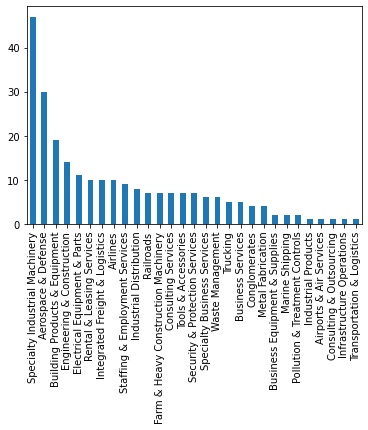

In [8]:
df_industry['industry'].value_counts().plot.bar();

### Key Metrics

In [9]:
def get_key_metrics_tickers(tickers, period):
    """
    Input: a list of stock tickers and period ('FY', or 'quarter')
    Output: pandas dataframe for selected key metrics
    """ 
    metrics = [
        'peRatio',
        'enterpriseValueOverEBITDA',
        'evToSales',
        'freeCashFlowYield',
        'debtToEquity',
        'roic',
        'roe'
    ]
    
    dataframes = []
    
    for ticker in (tickers):
        df = get_key_metrics(ticker, period)
        dataframes.append(df)
    df = pd.concat(dataframes)
    df['peRatio'] = pd.to_numeric(df['peRatio'])
    df['enterpriseValueOverEBITDA'] = pd.to_numeric(df['enterpriseValueOverEBITDA'])
    df['evToSales'] = pd.to_numeric(df['evToSales'])
    df['freeCashFlowYield'] = pd.to_numeric(df['freeCashFlowYield'])
    df['debtToEquity'] = pd.to_numeric(df['debtToEquity'])
    df['roic'] = pd.to_numeric(df['roic'])
    df['roe'] = pd.to_numeric(df['roe'])
    
    return df[metrics]


def make_comparison_plot(df_0, ticker_a, ticker_b, metrics):
    
    df_a = df_0.loc[ticker_a][metrics][:20].sort_index()
    df_b = df_0.loc[ticker_b][metrics][:20].sort_index()
    df = pd.concat([df_a, df_b], axis=1)
    df.columns = [metrics + '_' + ticker_a, metrics + '_' + ticker_b]
    ax = df.plot.bar(figsize=(10,7), grid=True)
    ax.set_xlabel('')
    ax.set_ylabel(metrics, fontsize=14)
    plt.tight_layout()
    
    return ax   

### Tickers selection
get quarterly key metrics for given sector and market cap

In [10]:
df_metrics_quarter = get_key_metrics_tickers(tickers, 'quarter')
#df_metrics_quarter.head(2)

In [11]:
tickers_selected = df_metrics_quarter.index.get_level_values(0).unique().to_list()
print("number of selected tickers =", len(tickers_selected))

number of selected tickers = 238


In [12]:
df_last4q = df_metrics_quarter.groupby('symbol').head(4)
pe_25 = df_last4q['peRatio'].groupby('symbol').min().describe()['25%']
pe_75 = df_last4q['peRatio'].groupby('symbol').max().describe()['75%']
print("pe_25=", pe_25)
print("pe_75=", pe_75)

pe_25= -13.415553435114504
pe_75= 61.842472779122026


In [51]:
df_last4q[['peRatio']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
peRatio,939.0,1283.769662,36786.008113,-13925.215032,7.659182,19.21434,31.618574,1.125921e+06


<AxesSubplot:>

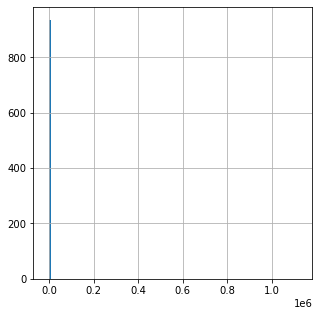

In [67]:
fig, ax = plt.subplots(figsize=(5,5))
df_last4q['peRatio'].hist(bins=100)
#ax.set_xlim(-3000, 10000)

In [23]:
df_last4q[df_last4q['peRatio'] > pe_75].index.get_level_values(0).nunique()

59

In [68]:
tickers_ignored = set(df_last4q[(df_last4q['peRatio'] <= pe_25) | (df_last4q['peRatio'] >= pe_75)].index.get_level_values(0).unique())
all_tickers = set(df_metrics_quarter.index.get_level_values(0).unique())
tickers_selected = list(all_tickers - tickers_ignored)
print(tickers_selected)
print('\n')
print("number of selected tickers =", len(tickers_selected))

['IEP', 'AOS', 'CMI', 'JBHT', 'LHX', 'HEI-A', 'UNP', 'R', 'TRN', 'ATI', 'RBC', 'ROK', 'ASGN', 'FSS', 'ROP', 'BRC', 'VMI', 'AEIS', 'KSU', 'OSK', 'AWI', 'SPR', 'AVY', 'EME', 'ATKR', 'TTC', 'IEX', 'CW', 'DAL', 'SAVE', 'RCII', 'MMM', 'APG', 'PWR', 'AJRD', 'DOV', 'MMS', 'WBT', 'ITW', 'WM', 'WWD', 'UPS', 'UAL', 'J', 'GTLS', 'TTEK', 'KEX', 'VRT', 'ADP', 'SNA', 'SWK', 'RXN', 'OC', 'NOC', 'TREX', 'EMR', 'ALK', 'BLDR', 'HON', 'GNRC', 'SNDR', 'AAL', 'AAON', 'TKR', 'LSTR', 'FIX', 'GWW', 'IAA', 'GE', 'AYI', 'SPXC', 'DCI', 'DY', 'IBP', 'DE', 'MSM', 'HEI', 'HII', 'PAYX', 'AL', 'PH', 'OTIS', 'FCN', 'ODFL', 'HUBG', 'BLD', 'CAT', 'MAS', 'MIDD', 'ENR', 'LMT', 'CHRW', 'FELE', 'GATX', 'WSO', 'EXPD', 'AME', 'JBLU', 'NSC', 'SSW', 'WTS', 'WAB', 'AGCO', 'LECO', 'LPX', 'RHI', 'TNET', 'URI', 'KNX', 'RSG', 'EAF', 'FAST', 'HUBB', 'BMI', 'VVNT', 'CR', 'CPRT', 'BMCH', 'CARR', 'CAR', 'PCAR', 'PRG', 'MLI', 'BAH', 'SSD', 'VRSK', 'TRU', 'CTAS', 'MWA', 'WCC', 'MLHR', 'CSL', 'SAIA', 'AYR', 'JBT', 'ABM', 'WERN', 'MTZ', 'CO

In [69]:
# Selected tickers' statistic
quarterly_stat = df_metrics_quarter.loc[tickers_selected].describe().transpose()
quarterly_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,12533.0,21.136050,186.370806,-1634.062915,11.316746,16.688602,22.867744,14899.183085
enterpriseValueOverEBITDA,12569.0,43.994708,414.118331,-6220.221390,24.634256,35.622456,47.980655,36851.394297
evToSales,12566.0,7.275159,57.168409,-147.697287,3.234703,5.043413,8.055709,6370.177242
freeCashFlowYield,12545.0,0.448150,91.686765,-3945.904222,-0.001527,0.011471,0.023936,9480.320150
debtToEquity,12555.0,0.544594,13.951525,-990.500000,0.170948,0.461395,0.899327,211.819444
roic,12515.0,0.031163,0.185948,-7.796170,0.021914,0.036325,0.054166,12.785893
roe,12555.0,0.032014,0.828553,-63.833333,0.023884,0.039251,0.057804,29.413793


### Get key metrics for selected tickers
FY

In [70]:
df_metrics = get_key_metrics_tickers(tickers_selected, 'FY')
df_metrics

peRatio  enterpriseValueOverEBITDA  evToSales  \
symbol date                                                          
IEP    2020-12-31  -7.468276                -319.077850   2.794027   
       2019-12-31 -10.743123                 -12.875305   1.751224   
       2018-12-31   6.017068                  13.936267   1.234890   
       2017-12-31   3.859983                  19.988485   1.465681   
       2016-12-31  -7.312703                 -12.439827   2.299133   
...                      ...                        ...        ...   
BWXT   2014-12-31  71.896731                  20.271180   0.718412   
       2013-12-31   7.891594                   4.116536   0.729668   
       2012-12-31   9.743073                   5.229536   0.557686   
       2011-12-31  12.520563                   5.604218   0.580697   
       2010-12-31  15.556716                   7.641646   0.743361   

                   freeCashFlowYield  debtToEquity      roic       roe  
symbol date                                                             
IEP    2020-12-31          -0.049817           NaN -0.027322       NaN  
       2019-12-31          -0.155109      1.501466 -0.123128 -0.197214  
       2018-12-31           0.059664      1.116768  0.037088  0.310823  
       2017-12-31          -0.144669      1.550725  0.018504  0.471014  
       2016-12-31           0.099656      5.162024 -0.139983 -0.513463  
...                              ...           ...       ...       ...  
BWXT   2014-12-31          -0.000864      0.285370 -0.001083  0.029426  
       2013-12-31           0.025900      0.000193  0.302601  0.297142  
       2012-12-31           0.044307      0.000436  0.159732  0.230826  
       2011-12-31           0.051652      0.000767  0.142496  0.205443  
       2010-12-31           0.054003      0.001199  0.125061  0.214996  

[3739 rows x 7 columns]

In [71]:
df_metrics.dropna().index.get_level_values(0).nunique()

139

In [72]:
FY_stat = df_metrics.dropna().describe().transpose()
FY_stat

,count,mean,std,min,25%,50%,75%,max
peRatio,3694.0,2124.936677,128091.982411,-9178.982680,9.310118,16.235360,22.892826,7.785210e+06
enterpriseValueOverEBITDA,3694.0,5568.394732,338078.944915,-15274.992935,5.796973,9.000565,12.557294,2.054786e+07
evToSales,3694.0,845.255355,50429.031389,-0.471381,0.687818,1.173690,1.959321,3.064595e+06
freeCashFlowYield,3694.0,0.509240,44.530902,-1605.401350,0.017135,0.046911,0.081115,1.463519e+03
debtToEquity,3694.0,0.938063,15.532374,-181.813559,0.203517,0.515901,1.026616,8.320000e+02
roic,3694.0,0.128109,0.327549,-3.986988,0.086414,0.137427,0.204032,1.287716e+01
roe,3694.0,0.160756,1.577907,-25.100000,0.092141,0.147252,0.209177,7.038462e+01


In [73]:
FY_stat['50%'].to_frame().transpose()

,peRatio,enterpriseValueOverEBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe
50%,16.23536,9.000565,1.17369,0.046911,0.515901,0.137427,0.147252


In [77]:
df_metrics.dropna().groupby(level=0).median().sort_values(by=['peRatio', 'enterpriseValueOverEBITDA', 'evToSales', 'debtToEquity'])[:30]

,peRatio,enterpriseValueOverEBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe
symbol,,,,,,,
APG,-2711.790626,-2707.741705,845.681720,0.000069,0.574155,-0.020443,-0.092642
VVNT,-1.682288,-23.236766,2.630962,0.241751,-1.893372,-0.109608,0.325573
SPXC,2.429027,4.214836,0.363144,0.138365,0.809741,0.078920,0.093126
AAL,2.429306,5.215664,0.736723,-0.047697,-2.219518,0.088451,0.420751
BLDR,3.452777,8.579520,0.505674,0.040681,3.026671,0.116267,0.002375
EAF,4.442643,5.600393,2.960426,0.217114,-2.263565,0.618542,-0.935387
AJRD,4.613431,4.617778,0.522497,0.079029,1.017918,0.084415,0.166181
IEP,4.638405,13.464783,3.011963,0.093717,1.131356,0.028222,0.086634
TRN,4.778617,6.309794,0.727074,-0.025370,0.859484,0.081138,0.088630


In [78]:
df_metrics.dropna().groupby(level=0).mean().sort_values(by=['freeCashFlowYield', 'roic', 'roe'], ascending=False).head()

,peRatio,enterpriseValueOverEBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe
symbol,,,,,,,
BMI,19.621700,9.358027,1.475664,41.793469,0.196108,0.168667,0.121213
EAF,3.716709,5.752634,2.391980,24.586513,-2.124529,0.521934,-0.868402
DCI,17.728283,9.925211,1.423071,18.246970,0.345348,0.229634,0.211281
TTC,18.351519,9.383966,1.066560,2.026879,0.884564,0.226861,0.235133
IEP,235915.379627,622672.592409,92870.092174,1.679053,1.198925,0.020713,0.069231


In [94]:
df_metrics.dropna().groupby(level=0).median().sort_values(by=['debtToEquity'], ascending=False).head(10)

,peRatio,enterpriseValueOverEBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe
symbol,,,,,,,
WBT,29.138520,15.900826,2.414526,-0.051624,6.347157,0.138214,0.320238
GATX,9.223279,9.568693,3.272129,-0.168201,3.143524,0.044485,0.126799
BLDR,3.452777,8.579520,0.505674,0.040681,3.026671,0.116267,0.002375
BAH,18.228974,10.679993,1.027381,0.064419,2.864126,0.207877,0.591631
COL,10.646695,1.670239,1.750502,0.079974,2.705967,0.181295,0.350337
UAL,9.004417,4.582600,0.639427,0.102774,2.653019,0.113343,0.241994
URI,9.656130,7.103076,1.934489,-0.010724,2.469235,0.120266,0.195820
ATKR,12.037801,9.338778,1.063269,0.104449,2.445309,0.170927,0.402479
AL,10.429150,10.278773,9.519733,-0.629179,2.400488,0.055193,0.092349


### Check interesting stocks
quarterly key metrics

In [296]:
ticker_of_interest = 'R'

In [297]:
profile = get_profile(ticker_of_interest)
profile.iloc[[0, 4, 9, 14, 15, 17, 19, 20,]]

,0
symbol,R
mktCap,4139842560
currency,USD
exchangeShortName,NYSE
industry,Rental & Leasing Services
description,"Ryder System, Inc. provides transportation and..."
sector,Industrials
country,US


In [298]:
df_stock_metrics = df_metrics_quarter.loc[ticker_of_interest]
df_stock_metrics.head()

,peRatio,enterpriseValueOverEBITDA,evToSales,freeCashFlowYield,debtToEquity,roic,roe
date,,,,,,,
2020-12-31,32.466366,14.502058,4.422708,0.065379,2.701619,0.007746,0.011362
2020-09-30,15.880705,14.521529,4.198226,0.185977,2.930949,0.011291,0.016663
2020-06-30,-6.810971,18.653685,4.925376,0.191321,3.097180,0.000889,-0.034320
2020-03-31,-3.240444,15.958267,4.255720,0.005367,3.264246,0.000859,-0.048875
2019-12-31,-13.524779,20.360200,4.719753,-0.078308,2.733997,0.001312,-0.021599


In [299]:
quarterly_stat.loc[['peRatio', 'enterpriseValueOverEBITDA']]

,count,mean,std,min,25%,50%,75%,max
peRatio,12533.0,21.136050,186.370806,-1634.062915,11.316746,16.688602,22.867744,14899.183085
enterpriseValueOverEBITDA,12569.0,43.994708,414.118331,-6220.221390,24.634256,35.622456,47.980655,36851.394297


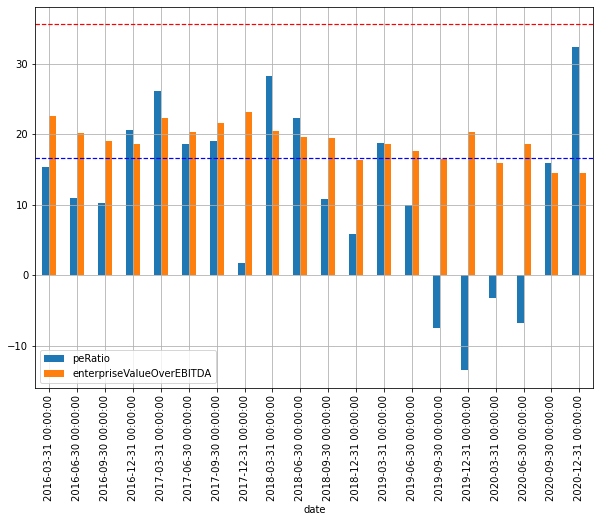

In [300]:
df_stock_metrics[['peRatio', 'enterpriseValueOverEBITDA']][:20].sort_index().plot.bar(grid=True, figsize=(10,7));
plt.axhline(y = quarterly_stat.loc['peRatio']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['enterpriseValueOverEBITDA']['50%'], lw=1.2,ls='--', color='r');

In [301]:
quarterly_stat.loc[['evToSales']]

,count,mean,std,min,25%,50%,75%,max
evToSales,12566.0,7.275159,57.168409,-147.697287,3.234703,5.043413,8.055709,6370.177242


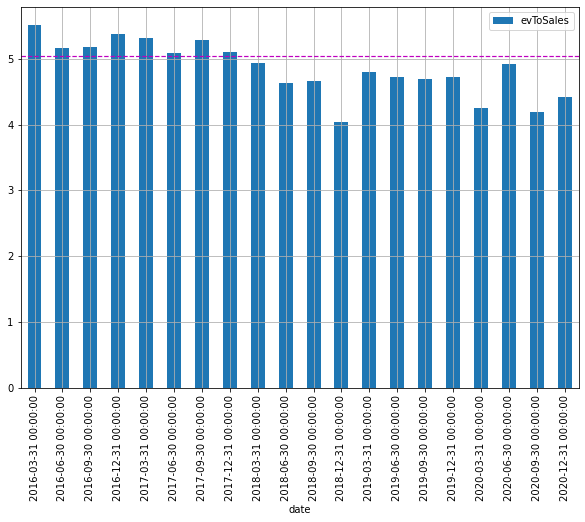

In [302]:
df_stock_metrics['evToSales'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['evToSales']['50%'], lw=1.2,ls='--', color='m');

In [303]:
quarterly_stat.loc[['freeCashFlowYield']]

,count,mean,std,min,25%,50%,75%,max
freeCashFlowYield,12545.0,0.44815,91.686765,-3945.904222,-0.001527,0.011471,0.023936,9480.32015


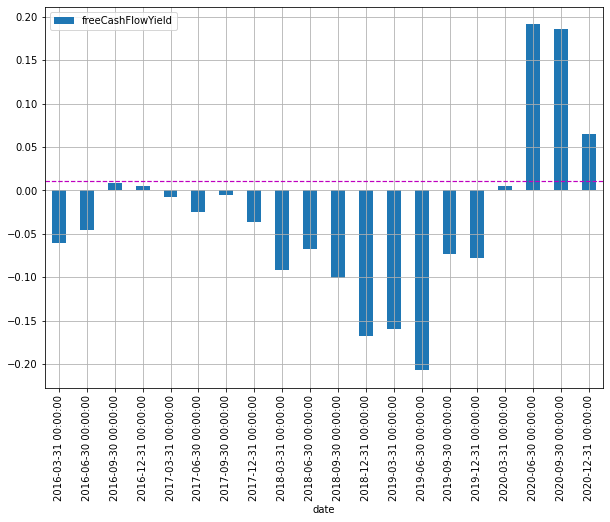

In [304]:
df_stock_metrics['freeCashFlowYield'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['freeCashFlowYield']['50%'], lw=1.2,ls='--', color='m');

In [305]:
quarterly_stat.loc[['roic', 'roe']]

,count,mean,std,min,25%,50%,75%,max
roic,12515.0,0.031163,0.185948,-7.796170,0.021914,0.036325,0.054166,12.785893
roe,12555.0,0.032014,0.828553,-63.833333,0.023884,0.039251,0.057804,29.413793


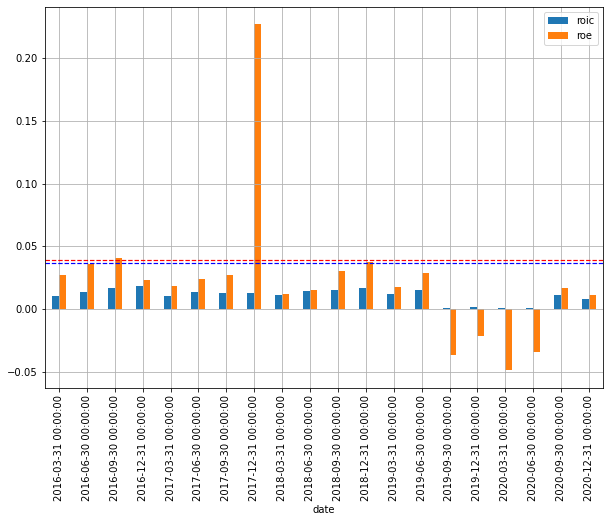

In [306]:
df_stock_metrics[['roic', 'roe']][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['roic']['50%'], lw=1.2,ls='--', color='b');
plt.axhline(y = quarterly_stat.loc['roe']['50%'], lw=1.2,ls='--', color='r');

In [307]:
quarterly_stat.loc[['debtToEquity']]

,count,mean,std,min,25%,50%,75%,max
debtToEquity,12555.0,0.544594,13.951525,-990.5,0.170948,0.461395,0.899327,211.819444


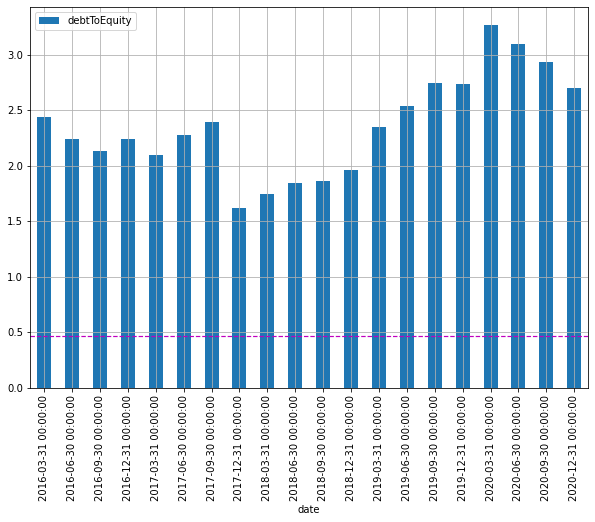

In [308]:
df_stock_metrics['debtToEquity'][:20].sort_index().plot.bar(grid=True, figsize=(10,7), legend=True);
plt.axhline(y = quarterly_stat.loc['debtToEquity']['50%'], lw=1.2,ls='--', color='m');

### Income Statement

In [309]:
df_income = get_income_statement(ticker_of_interest, 'FY')
df_income.head()

revenue  costOfRevenue  grossProfit  grossProfitRatio  \
symbol date                                                                 
R      2020-12-31  8420.091       7144.603     1275.488          0.151481   
       2019-12-31  8925.801       7555.224     1370.577          0.153552   
       2018-12-31  8409.215       6827.664     1581.551          0.188074   
       2017-12-31  7329.599       5865.831     1463.768          0.199706   
       2016-12-31  6786.984       5285.568     1501.416          0.221220   

                   researchAndDevelopmentExpenses  \
symbol date                                         
R      2020-12-31                             0.0   
       2019-12-31                             0.0   
       2018-12-31                             0.0   
       2017-12-31                             0.0   
       2016-12-31                             0.0   

                   generalAndAdministrativeExpenses  \
symbol date                                           
R      2020-12-31                           921.573   
       2019-12-31                           907.449   
       2018-12-31                           854.807   
       2017-12-31                           871.983   
       2016-12-31                           842.697   

                   sellingAndMarketingExpenses  otherExpenses  \
symbol date                                                     
R      2020-12-31                          0.0         10.688   
       2019-12-31                          0.0        -55.835   
       2018-12-31                          0.0         -0.926   
       2017-12-31                          0.0        -20.768   
       2016-12-31                          0.0         13.068   

                   operatingExpenses  costAndExpenses  ...  \
symbol date                                            ...   
R      2020-12-31           1044.993         8189.596  ...   
       2019-12-31           1029.429         8584.653  ...   
       2018-12-31            980.130         7807.794  ...   
       2017-12-31            987.490         6853.321  ...   
       2016-12-31            956.158         6241.726  ...   

                   totalOtherIncomeExpensesNet  incomeBeforeTax  \
symbol date                                                       
R      2020-12-31                      -99.513         -130.360   
       2019-12-31                     -142.038          -42.271   
       2018-12-31                      -49.000          373.861   
       2017-12-31                      -22.142          313.786   
       2016-12-31                        8.966          406.381   

                   incomeBeforeTaxRatio  incomeTaxExpense  netIncome  \
symbol date                                                            
R      2020-12-31             -0.015482           -18.364   -122.250   
       2019-12-31             -0.004736           -18.999    -24.410   
       2018-12-31              0.044458            98.254    273.298   
       2017-12-31              0.042811          -477.229    790.558   
       2016-12-31              0.059877           141.741    262.477   

                   netIncomeRatio        eps  epsdiluted  \
symbol date                                                
R      2020-12-31       -0.014519  -2.294555   -2.294555   
       2019-12-31       -0.002735  -0.457972   -0.470000   
       2018-12-31        0.032500   5.145295    5.145295   
       2017-12-31        0.107858  14.929569   14.870000   
       2016-12-31        0.038674   4.909927    4.900000   

                   weightedAverageShsOut  weightedAverageShsOutDil  
symbol date                                                         
R      2020-12-31               53278316                  53278316  
       2019-12-31               53278316                  53278316  
       2018-12-31               53116485                  53116485  
       2017-12-31               52955314                  53167451  
       2016-12-31    

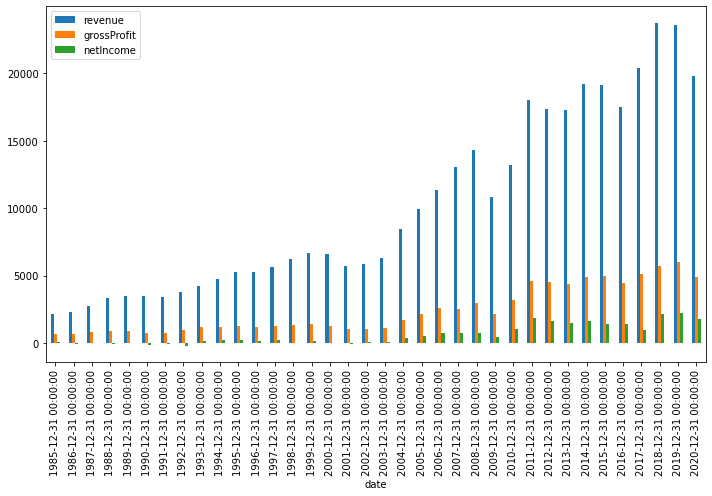

In [289]:
df_income.loc[ticker_of_interest][['revenue', 'grossProfit', 'netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

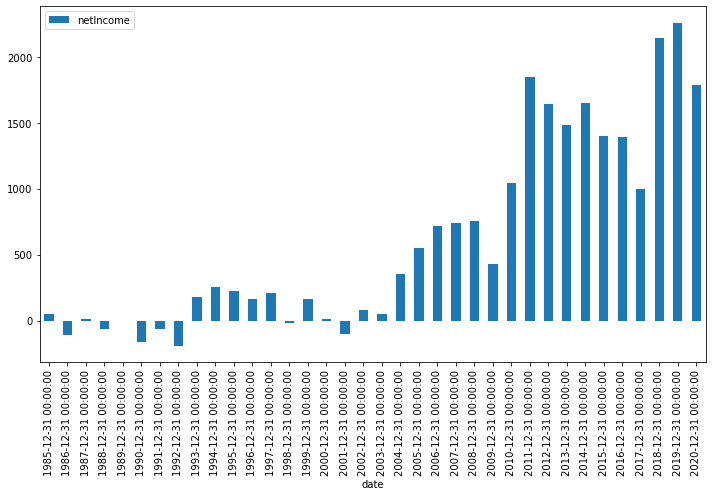

In [290]:
df_income.loc[ticker_of_interest][['netIncome']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

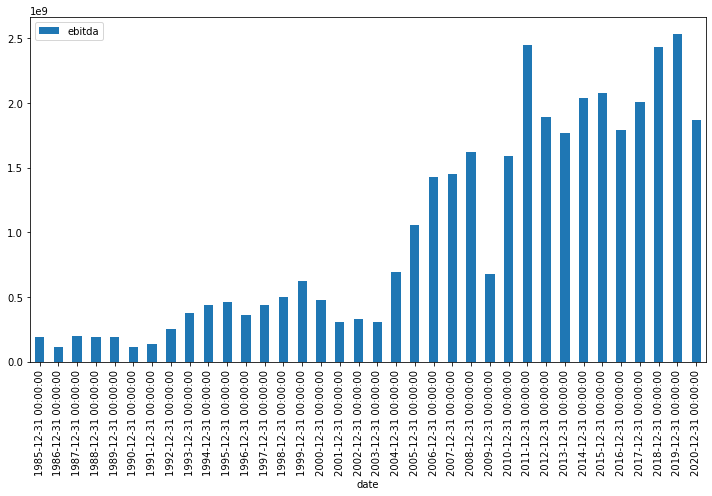

In [291]:
df_income.loc[ticker_of_interest][['ebitda']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

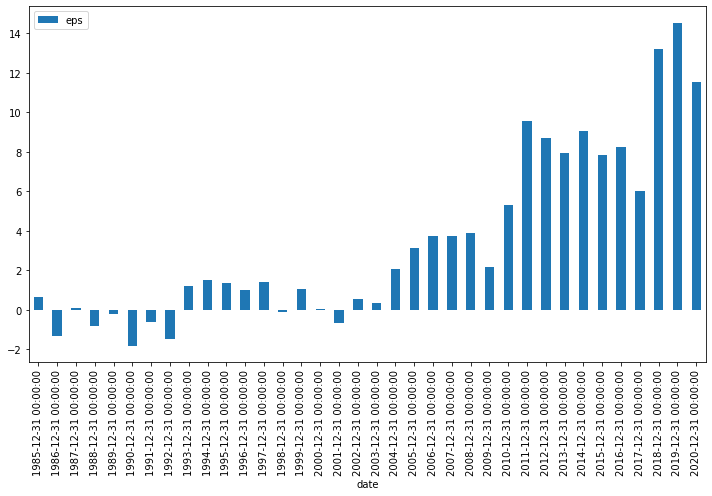

In [292]:
df_income.loc[ticker_of_interest][['eps']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Cashflow Statement

In [293]:
df_cashflow = get_cash_flow_statement(ticker_of_interest, 'FY')
df_cashflow.head()

netIncome  depreciationAndAmortization  deferredIncomeTax  \
symbol date                                                                    
CMI    2020-12-31     1789.0                        673.0                7.0   
       2019-12-31     2260.0                        672.0               -4.0   
       2018-12-31     2141.0                        611.0              -82.0   
       2017-12-31      999.0                        583.0              766.0   
       2016-12-31     1394.0                        530.0               50.0   

                   stockBasedCompensation  changeInWorkingCapital  \
symbol date                                                         
CMI    2020-12-31                    31.0                   554.0   
       2019-12-31                    49.0                  -307.0   
       2018-12-31                    53.0                   183.0   
       2017-12-31                    41.0                  -131.0   
       2016-12-31                    32.0                  -762.0   

                   accountsReceivables  inventory  accountsPayables  \
symbol date                                                           
CMI    2020-12-31                  0.0       46.0             288.0   
       2019-12-31                  0.0      291.0            -310.0   
       2018-12-31                  0.0     -695.0             302.0   
       2017-12-31                  0.0     -407.0             639.0   
       2016-12-31                  0.0       -4.0             184.0   

                   otherWorkingCapital  otherNonCashItems  ...  dividendsPaid  \
symbol date                                                ...                  
CMI    2020-12-31                189.0             -359.0  ...         -782.0   
       2019-12-31               3127.0               31.0  ...         -761.0   
       2018-12-31               3434.0              128.0  ...         -718.0   
       2017-12-31               3251.0             -220.0  ...         -701.0   
       2016-12-31               3382.0              166.0  ...         -676.0   

                   otherFinancingActivites  \
symbol date                                  
CMI    2020-12-31                      1.0   
       2019-12-31                    100.0   
       2018-12-31                      1.0   
       2017-12-31                     34.0   
       2016-12-31                   -134.0   

                   netCashUsedProvidedByFinancingActivities  \
symbol date                                                   
CMI    2020-12-31                                     280.0   
       2019-12-31                                   -2095.0   
       2018-12-31                                   -1400.0   
       2017-12-31                                   -1074.0   
       2016-12-31                                   -1409.0   

                   effectOfForexChangesOnCash  netChangeInCash  \
symbol date                                                      
CMI    2020-12-31                         2.0           2272.0   
       2019-12-31                      -105.0           -174.0   
       2018-12-31                       -46.0            -66.0   
       2017-12-31                         0.0            249.0   
       2016-12-31                         0.0           -591.0   

                   cashAtEndOfPeriod  cashAtBeginningOfPeriod  \
symbol date                                                     
CMI    2020-12-31             3401.0                   1129.0   
       2019-12-31             1129.0                   1303.0   
       2018-12-31             1303.0                   1369.0   
       2017-12-31             1369.0                   1120.0   
       2016-12-31             1120.0                   1711.0   

                   operatingCashFlow  capitalExpenditure  freeCashFlow  
symbol date                                                             
CMI    2020-12-31             2722.0              -575.0        2147.0  
     

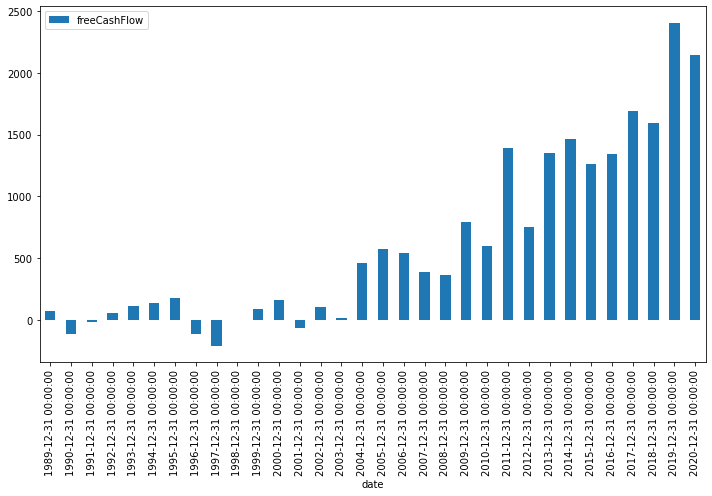

In [294]:
df_cashflow.loc[ticker_of_interest][['freeCashFlow']].sort_index().plot.bar(figsize = (10,7));
plt.tight_layout()

### Comparison
check for both FY and quarter

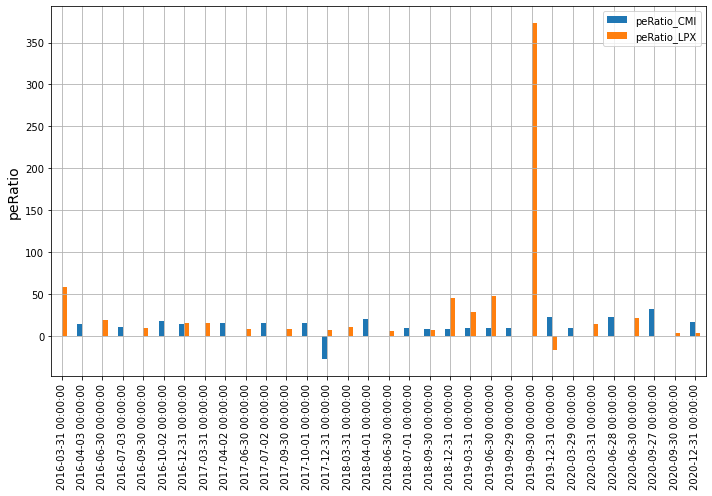

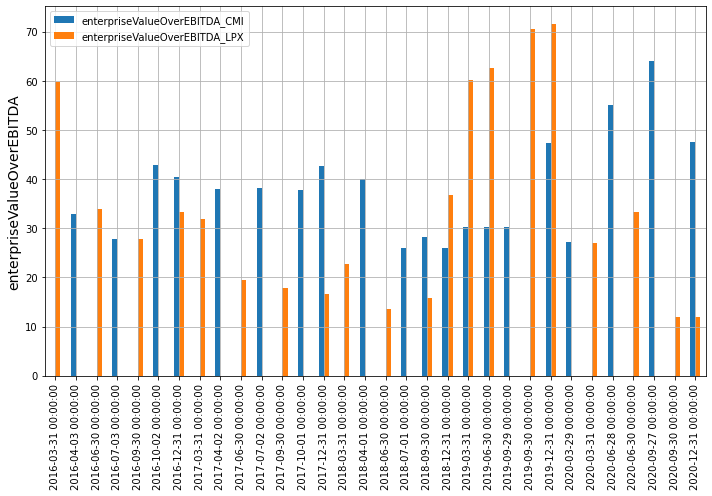

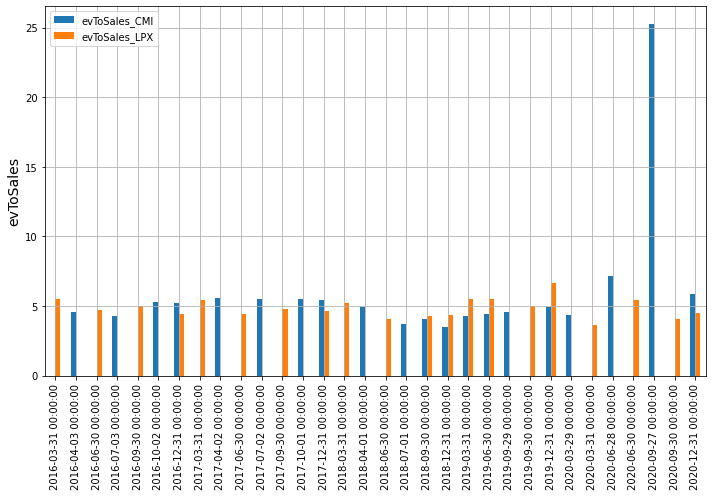

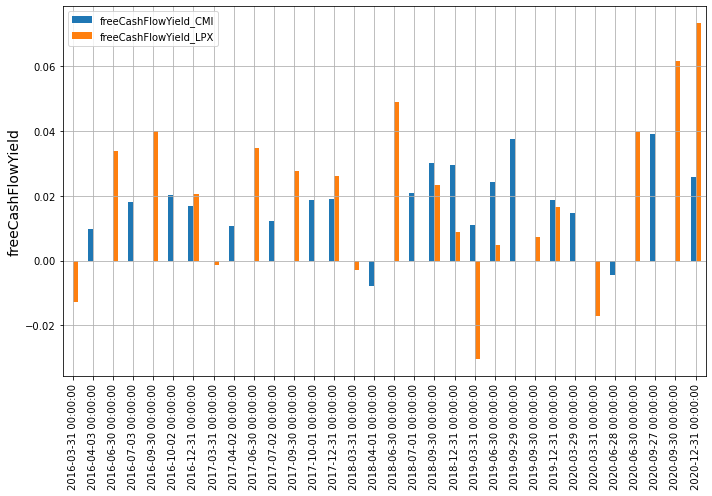

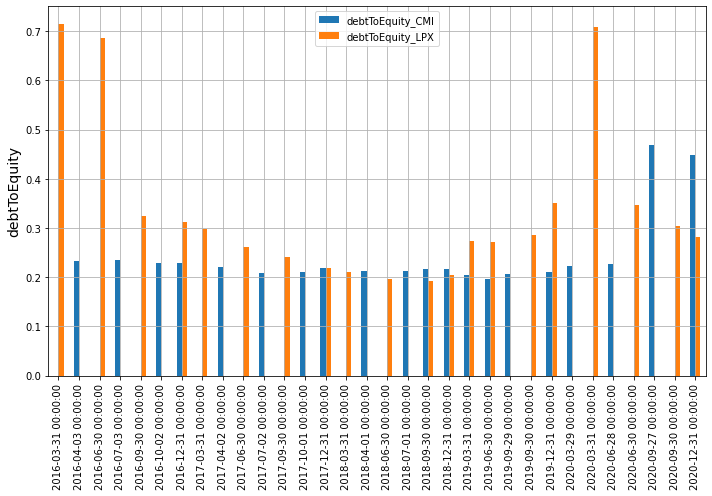

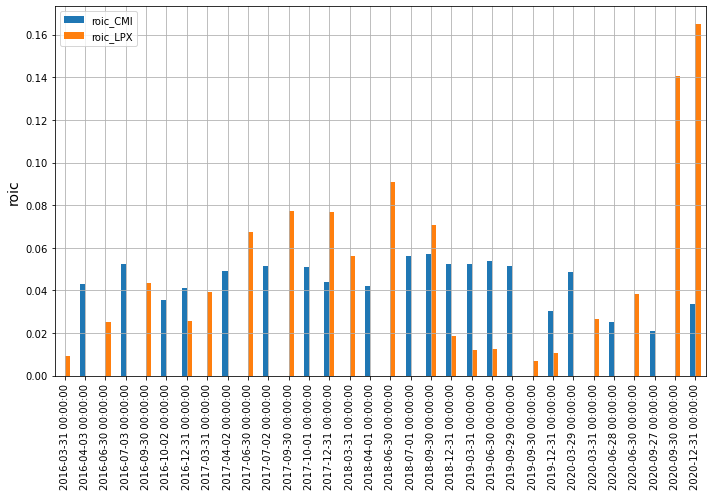

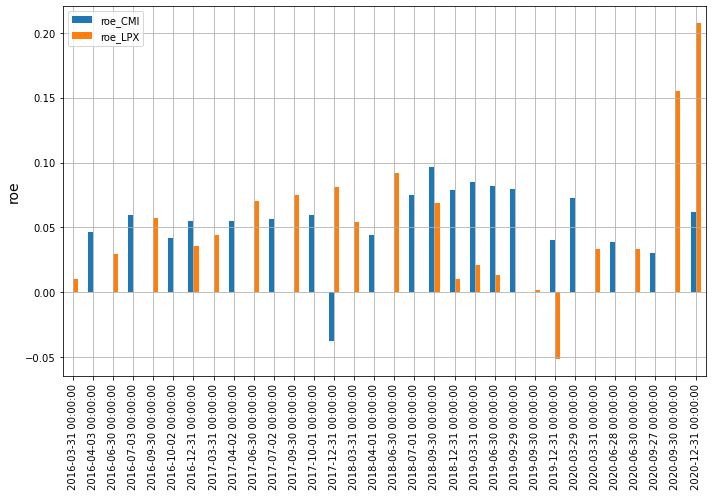

In [295]:
metrics = df_metrics.columns.to_list()

for metric in metrics:
    make_comparison_plot(df_metrics_quarter, ticker_of_interest, 'LPX', metric);

In [ ]:
earning_calender = get_earnings_calendar()

In [ ]:
earning_calender.loc['CE']